<a href="https://colab.research.google.com/github/rahulkhawashi/Dog-breed-vision/blob/main/ieee_cis_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-end IEEE-CIS Fraud Detection
Making this project to submit in kaggle compitition.

## 1. Problem
Detect fraud from customer transactions..

If successful, we’ll improve the efficacy of fraudulent transaction alerts for millions of people around the world, helping hundreds of thousands of businesses reduce their fraud loss and increase their revenue. And of course, you will save party people just like you the hassle of false positives.

## 2. Data
The data we are using from kaggle's IEEE-CIS Fraud Detection compitition.


## 3. Evaluation
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.     
(www.kaggle.com/competitions/ieee-fraud-detection/overview/evaluation)

## 4. Features
In this project you are predicting the probability that an online transaction is fraudulent, as denoted by the binary target `isFraud`.

The data is broken into two files `identity` and `transaction`, which are joined by `TransactionID`. Not all transactions have corresponding identity information.

TransactionDT: timedelta from a given reference datetime (not an actual timestamp)

TransactionAMT: transaction payment amount in USD

ProductCD: product code, the product for each transaction

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

addr: address

dist: distance

P_ and (R__) emaildomain: purchaser and recipient email domain

C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

D1-D15: timedelta, such as days between previous transaction, etc.

M1-M9: match, such as names on card and address, etc.

Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

### Get our workspace ready

In [1]:
import os

os.listdir("drive/MyDrive/CIS Fraud Detection/")

['sample_submission.csv',
 'test_identity.csv',
 'test_transaction.csv',
 'train_identity.csv',
 'train_transaction.csv']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_trans = pd.read_csv("drive/MyDrive/CIS Fraud Detection/train_transaction.csv",
                            dtype={
        'TransactionID': 'int32',
        'isFraud': 'int8',
        'TransactionDT': 'int32'
    }
  )

train_trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train = train_trans.sort_values('TransactionDT').reset_index(drop=True)


In [5]:
#Drop extremely sparse columns
missing_ratio = train.isna().mean()
train = train[missing_ratio[missing_ratio < 0.9].index]


In [6]:
for col in train.select_dtypes(include=['float64']).columns:
    train[col] = train[col].astype('float32')


In [7]:
print(f"Memory usage: {train.memory_usage(deep=True).sum()/1024**2:.2f} MB")


Memory usage: 1202.09 MB


In [8]:
list[list(train.columns)]

list[['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83'

In [9]:
train["TransactionDT"][:5]

,TransactionDT
0,86400
1,86401
2,86469
3,86499
4,86506


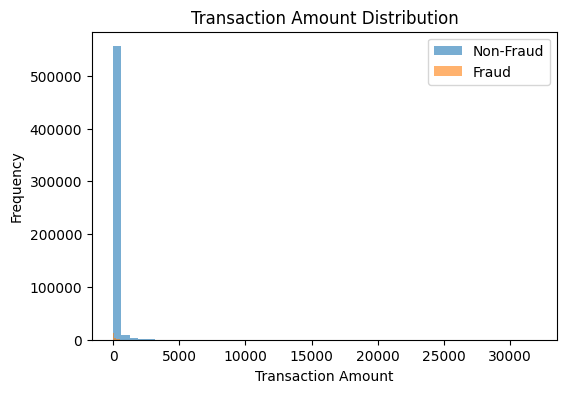

In [10]:
plt.figure(figsize=(6,4))
plt.hist(train.loc[train['isFraud']==0, 'TransactionAmt'], bins=50, alpha=0.6, label='Non-Fraud')
plt.hist(train.loc[train['isFraud']==1, 'TransactionAmt'], bins=50, alpha=0.6, label='Fraud')
plt.legend()
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-2267624282.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['time_bin'] = train['TransactionDT'] // 100000


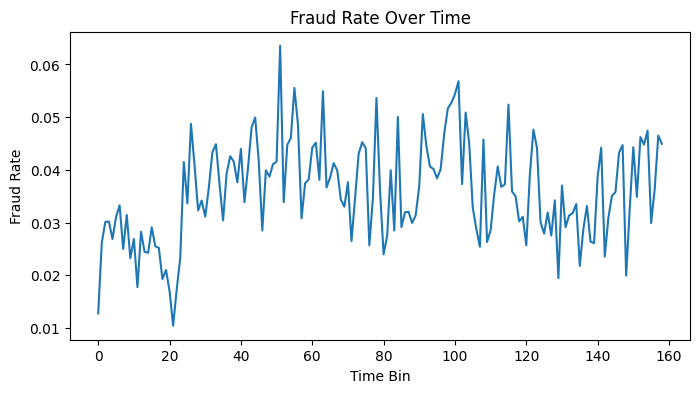

In [11]:

train['time_bin'] = train['TransactionDT'] // 100000

fraud_rate_time = train.groupby('time_bin')['isFraud'].mean()

plt.figure(figsize=(8,4))
fraud_rate_time.plot()
plt.title("Fraud Rate Over Time")
plt.xlabel("Time Bin")
plt.ylabel("Fraud Rate")
plt.show()


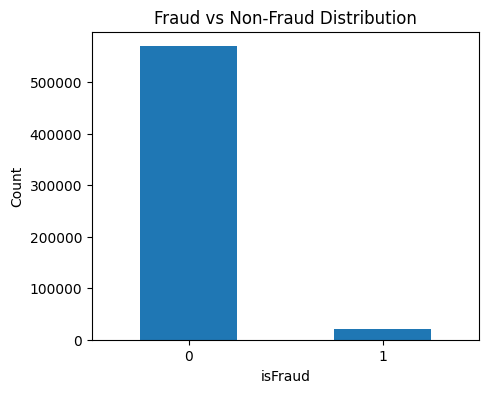

In [12]:
import matplotlib.pyplot as plt

fraud_counts = train['isFraud'].value_counts()

plt.figure(figsize=(5,4))
fraud_counts.plot(kind='bar')
plt.title("Fraud vs Non-Fraud Distribution")
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


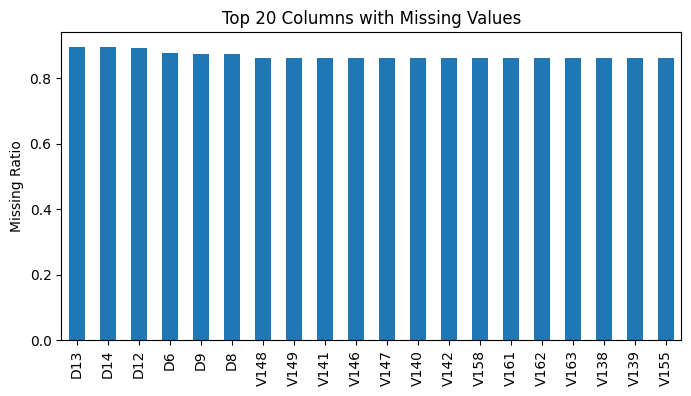

In [13]:
missing = train.isna().mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(8,4))
missing.plot(kind='bar')
plt.title("Top 20 Columns with Missing Values")
plt.ylabel("Missing Ratio")
plt.show()


In [14]:
TARGET = 'isFraud'

X = train.drop(columns=[TARGET])
y = train[TARGET]
